 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [221]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [222]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")


whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [223]:
# Count nulls

print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [224]:
# Drop nulls

whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [225]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [226]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [227]:
# Drop nulls

algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [228]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [229]:
# Check Data Types

sp500_history.dtypes

Close    object
dtype: object

In [230]:
# Fix Data Types

sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [231]:
# Calculate Daily Returns

sp500_daily_returns = sp500_history.pct_change()

In [232]:
# Drop nulls

sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [233]:
# Rename Column

sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [234]:
# Concatenate all DataFrames into a single DataFrame

df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

According to the graph below, Toger Global Management outperformed the S&P 500 on various dates. For example, the data shows that TGM outperformed the S&P 500 in Januaray 2017, and twice again around July 2018.


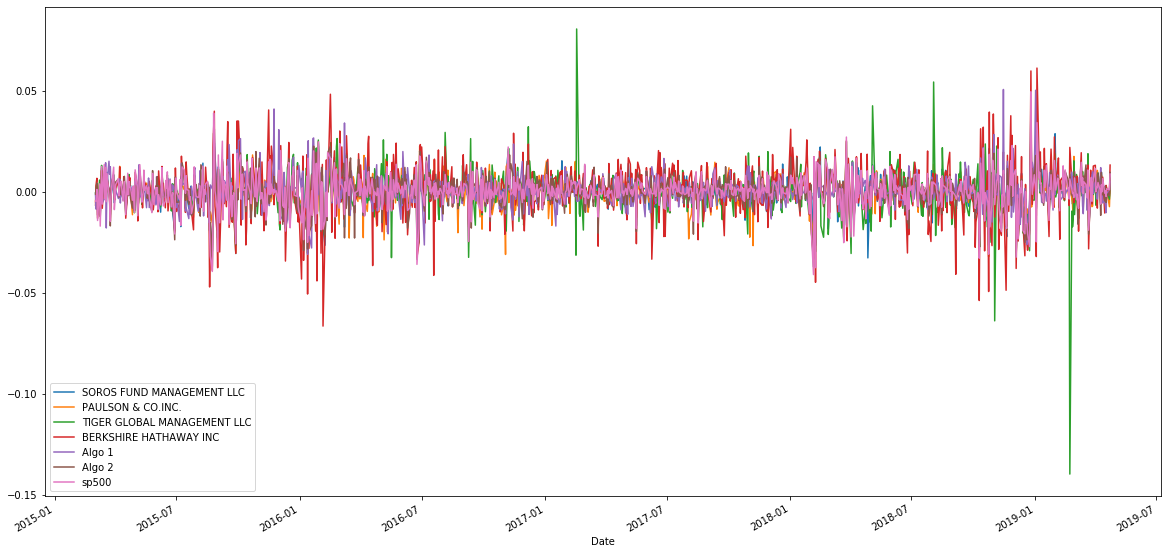

In [235]:
# Plot daily returns

df_daily.plot(figsize = (20,10))

print("According to the graph below, Toger Global Management outperformed the S&P 500 on various dates. For example, the data shows that TGM outperformed the S&P 500 in Januaray 2017, and twice again around July 2018.")

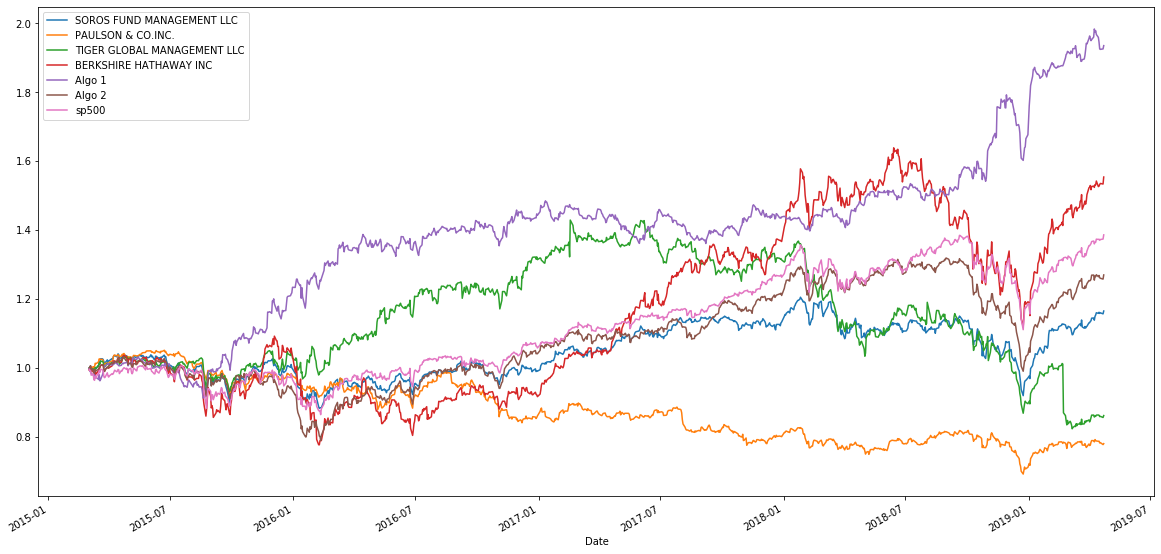

In [236]:
# Plot cumulative returns

df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

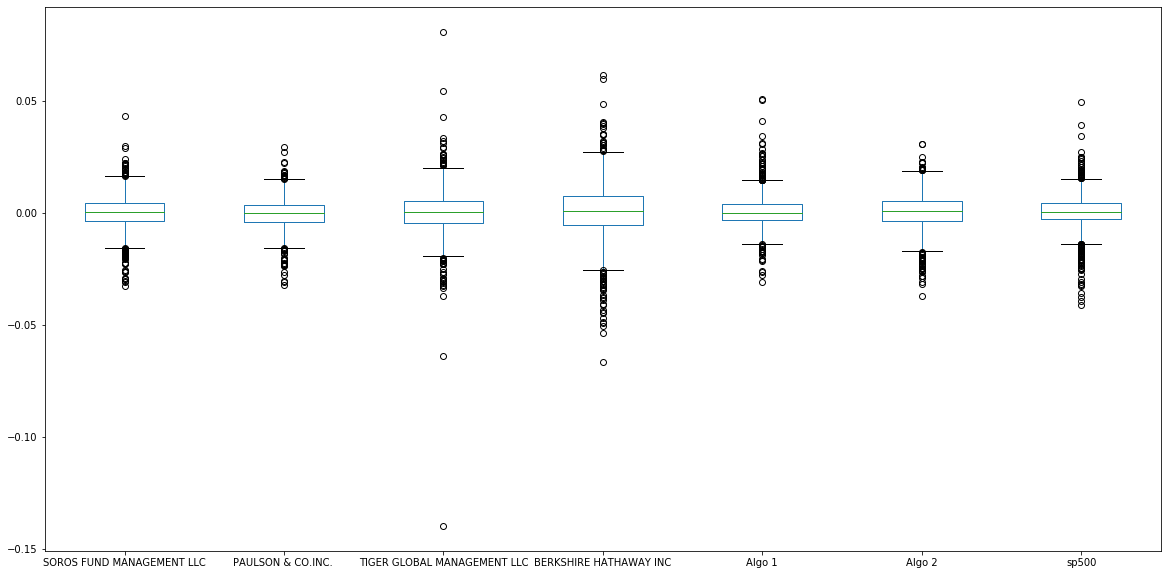

In [237]:
# Box plot to visually show risk

df_daily.plot.box(figsize = (20,10))

In [238]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?


df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std


,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [239]:
# Determine which portfolios are riskier than the S&P 500

higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [240]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std = df_daily_std *np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

According to the graph below, there is a postiive correlation between the level of risk for the various portfolios and the S&P 500.


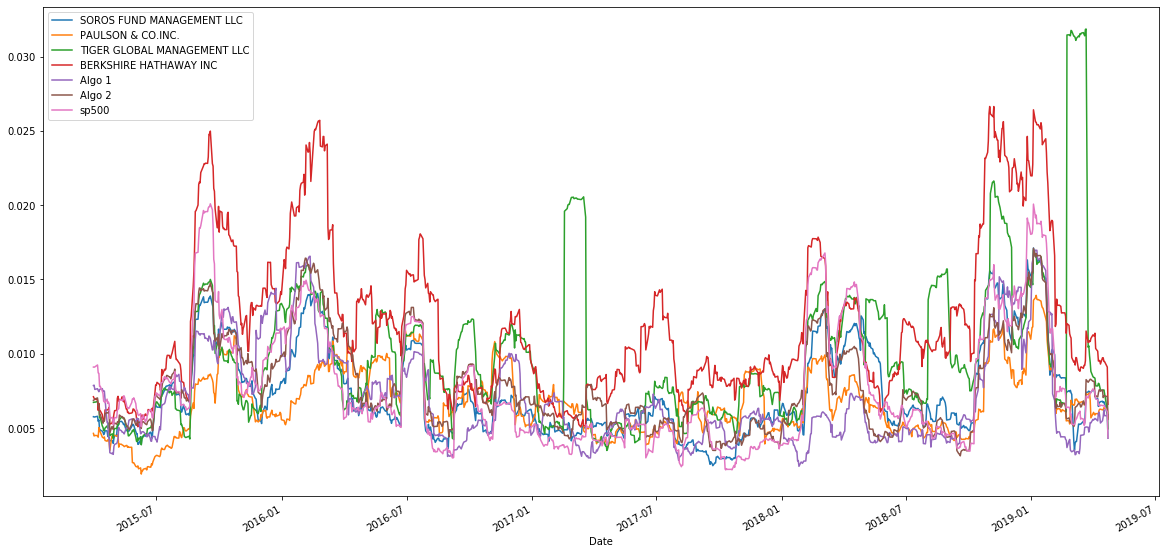

In [241]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window


df_daily_rolling_21 = df_daily.rolling(window = 21).std
df_daily_rolling_21().plot(figsize = (20,10))

print("According to the graph below, there is a postiive correlation between the level of risk for the various portfolios and the S&P 500.")

In [242]:
# Construct a correlation table


correlation = df_daily.corr()
print(correlation)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
sp500                                         0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

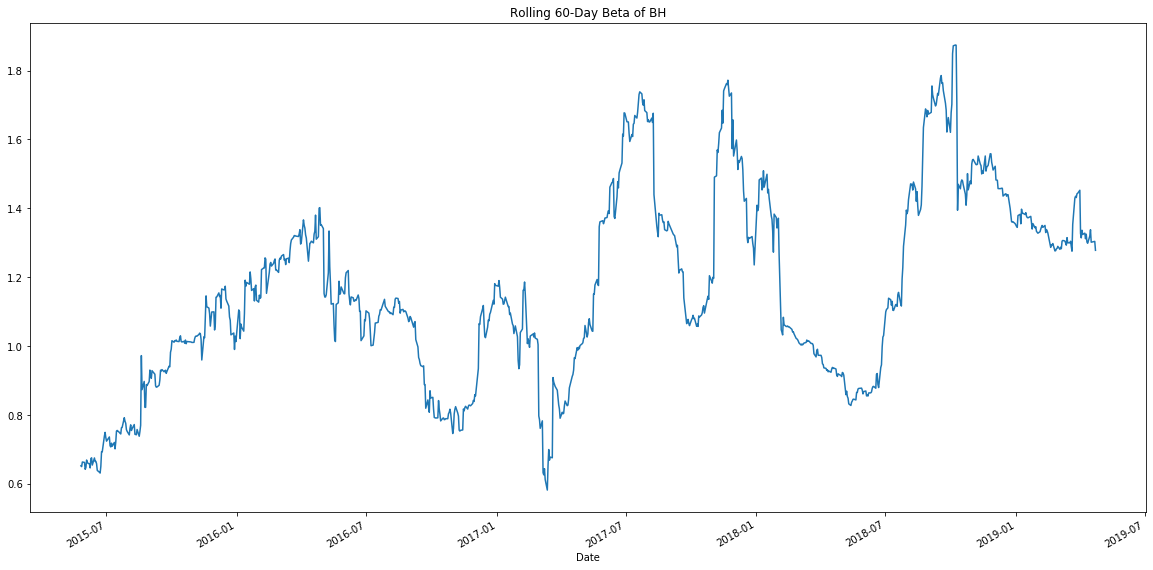

In [308]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

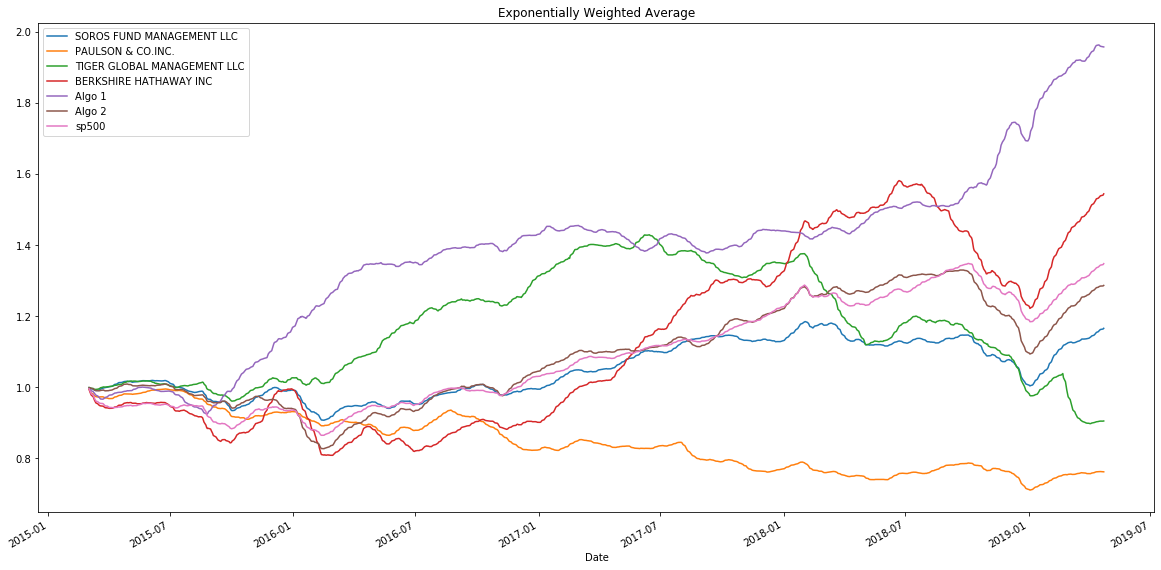

In [338]:
# Calculate a rolling window using the exponentially weighted moving average. 

df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10), title='Exponentially Weighted Average')


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [245]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (df_daily.mean() * 252) / (df_daily.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

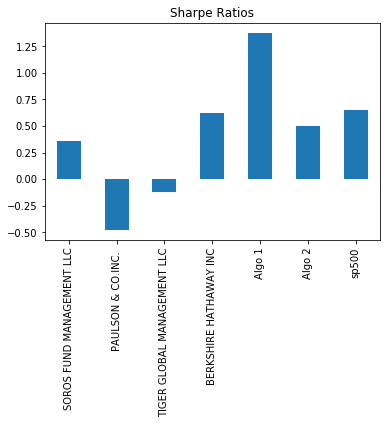

In [246]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [247]:
# Read the first stock

MMEDF_stock_csv = pd.read_csv(Path("/Users/jessicarosedecunhacarmichael/Desktop/Assingment_2/MMEDF_stock.csv"), index_col="Date", 
    parse_dates = True, infer_datetime_format= True)
MMEDF_stock_csv.rename(columns = {"Close":"MMEDF"}, inplace = True)
MMEDF_stock_csv.head()

,MMEDF
Date,
2019-06-05 16:00:00,0.58
2019-06-07 16:00:00,0.56
2019-06-10 16:00:00,0.55
2019-06-12 16:00:00,0.53
2019-06-19 16:00:00,0.44


In [248]:
# Read the second stock
RVV_stock_csv = pd.read_csv(Path("/Users/jessicarosedecunhacarmichael/Desktop/Assingment_2/RVV_stock.csv"), index_col="Date", 
    parse_dates = True, infer_datetime_format= True)
RVV_stock_csv.rename(columns = {"Close":"RVV"}, inplace = True)
RVV_stock_csv.head()

,RVV
Date,
2019-06-03 16:00:00,0.11
2019-06-04 16:00:00,0.10
2019-06-05 16:00:00,0.11
2019-06-07 16:00:00,0.10
2019-06-10 16:00:00,0.10


In [249]:
# Read the third stock
SHRM_stock_csv = pd.read_csv(Path("/Users/jessicarosedecunhacarmichael/Desktop/Assingment_2/SHRM_stock.csv"), index_col="Date", 
    parse_dates = True, infer_datetime_format= True)
SHRM_stock_csv.rename(columns = {"Close":"SHRM"}, inplace = True)
SHRM_stock_csv.head()

,SHRM
Date,
2020-03-02 16:00:00,0.22
2020-03-03 16:00:00,0.24
2020-03-04 16:00:00,0.33
2020-03-05 16:00:00,0.38
2020-03-06 16:00:00,0.35


In [442]:
# Concatenate all stocks into a single DataFrame
stocks = pd.concat([RVV_stock_csv, SHRM_stock_csv, MMEDF_stock_csv], axis = "columns", join = "inner" )
stocks.head()

,RVV,SHRM,MMEDF
Date,,,
2020-03-03 16:00:00,0.06,0.24,0.23
2020-03-04 16:00:00,0.10,0.33,0.58
2020-03-05 16:00:00,0.10,0.38,0.52
2020-03-06 16:00:00,0.09,0.35,0.40
2020-03-09 16:00:00,0.07,0.33,0.33


In [530]:
# Reset the index


stocks.reset_index(drop=True, inplace=True)
stocks.head()

,RVV,SHRM,MMEDF
0,0.06,0.24,0.23
1,0.10,0.33,0.58
2,0.10,0.38,0.52
3,0.09,0.35,0.40
4,0.07,0.33,0.33


In [531]:
# Pivot so that each column of prices represents a unique symbol

stocks = pd.concat([stocks], axis="columns", join="inner")

stocks.head()

,RVV,SHRM,MMEDF
0,0.06,0.24,0.23
1,0.10,0.33,0.58
2,0.10,0.38,0.52
3,0.09,0.35,0.40
4,0.07,0.33,0.33


In [532]:
# Drop Nulls

stocks.dropna(inplace = True)
stocks.head()

,RVV,SHRM,MMEDF
0,0.06,0.24,0.23
1,0.10,0.33,0.58
2,0.10,0.38,0.52
3,0.09,0.35,0.40
4,0.07,0.33,0.33


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [534]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

portfolio = stocks.dot(weights)
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace = True)


portfolio_returns.head()


1    0.905660
2   -0.009901
3   -0.160000
4   -0.130952
5    0.054795
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [535]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

portfolio_returns = pd.concat([portfolio_returns, df_daily], axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"Portfolio"}, inplace = True)
portfolio_returns


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
1,9.056604e-01,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2,-9.900990e-03,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
3,-1.600000e-01,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
4,-1.309524e-01,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
5,5.479452e-02,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
6,0.000000e+00,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
7,-5.194805e-02,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
8,-4.109589e-02,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075
9,-1.142857e-01,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.013534
10,0.000000e+00,0.002142,0.002928,-0.000687,0.000384,-0.002822,0.001274,-0.003320


In [537]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace = True)


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

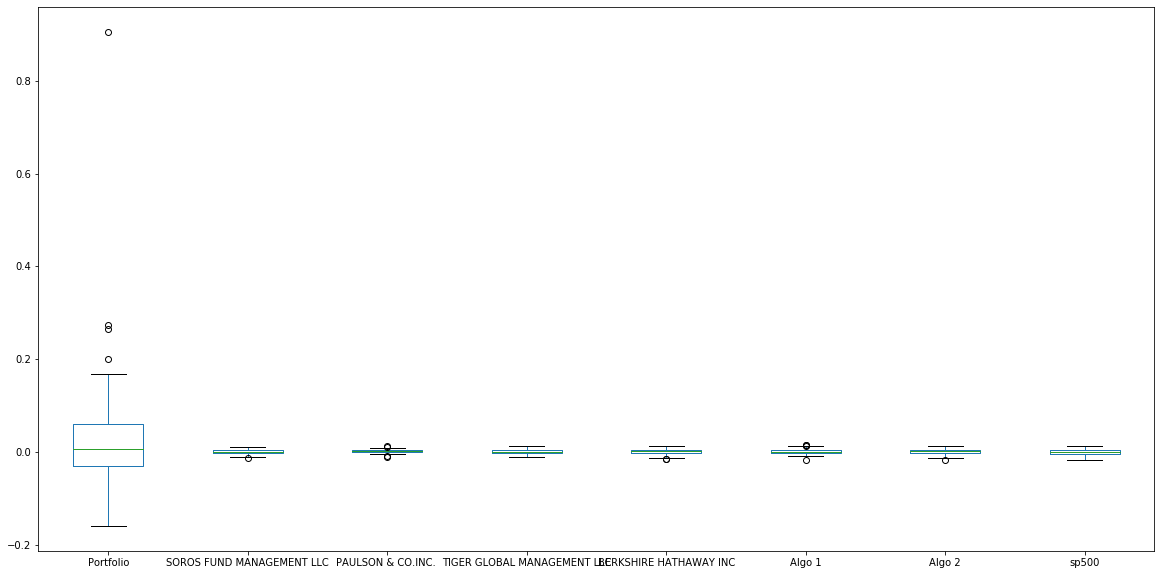

In [551]:
# Risk

portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

portfolio_returns.plot.box(figsize = (20,10))


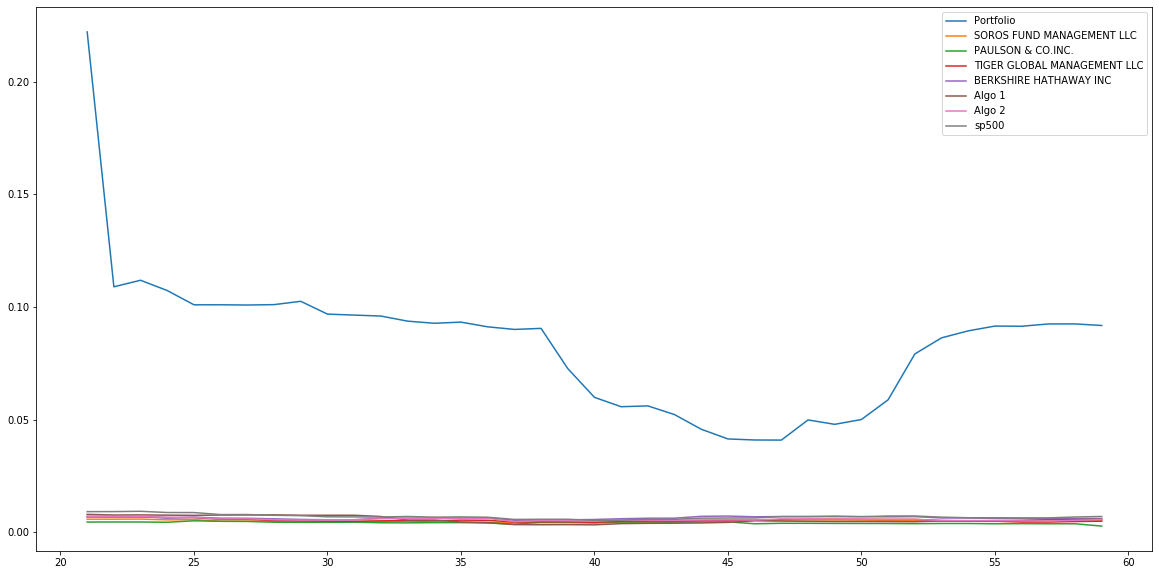

In [548]:
# Rolling

PR_rolling_21 = portfolio_returns.rolling(window = 21).std()
PR_rolling_21.plot(figsize = (20,10))


In [559]:
# Annualized Sharpe Ratios

sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

Portfolio                      3.784744
SOROS FUND MANAGEMENT LLC      1.786768
PAULSON & CO.INC.              3.537979
TIGER GLOBAL MANAGEMENT LLC    1.287747
BERKSHIRE HATHAWAY INC         1.605627
Algo 1                         0.745958
Algo 2                         0.709331
sp500                          0.330882
dtype: float64

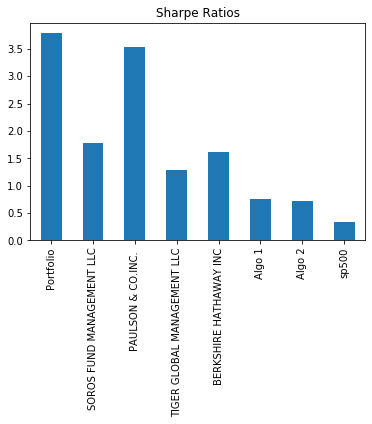

In [558]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [572]:
# Create a correlation analysis
correlation = portfolio_returns.corr()
print(correlation)


                             Portfolio  SOROS FUND MANAGEMENT LLC  \
Portfolio                     1.000000                   0.099855   
SOROS FUND MANAGEMENT LLC     0.099855                   1.000000   
PAULSON & CO.INC.             0.050451                   0.706800   
TIGER GLOBAL MANAGEMENT LLC  -0.059945                   0.852735   
BERKSHIRE HATHAWAY INC        0.115366                   0.822523   
Algo 1                        0.064159                   0.273483   
Algo 2                        0.146096                   0.792401   
sp500                        -0.009937                   0.850687   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Portfolio                              0.050451                    -0.059945   
SOROS FUND MANAGEMENT LLC              0.706800                     0.852735   
PAULSON & CO.INC.                      1.000000                     0.716074   
TIGER GLOBAL MANAGEMENT LLC            0.716074           

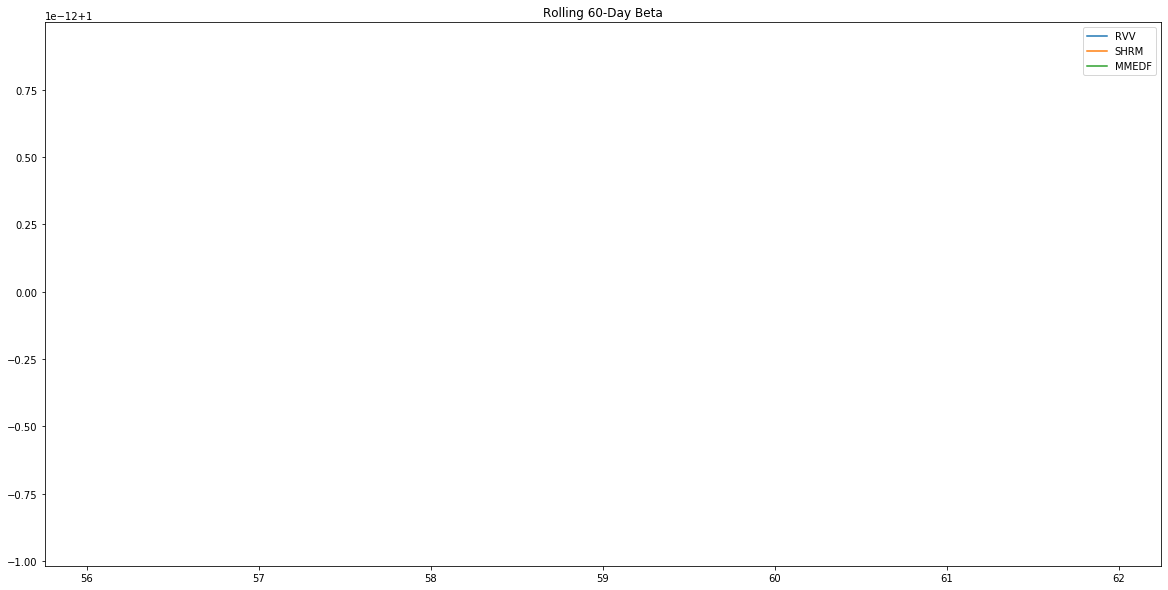

In [581]:
# Beta

rolling_covariance = stocks.rolling(window=60).cov(stocks)
rolling_variance = stocks.rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')
